# Extraction of glottal features from audio files

Compute features based on the glottal source reconstruction from sustained vowels
Nine descriptors are computed:

1. Variability of time between consecutive glottal closure instants (GCI)
2. Average opening quotient (OQ) for consecutive glottal cycles-> rate of opening phase duration / duration of glottal cycle
3. Variability of opening quotient (OQ) for consecutive glottal cycles-> rate of opening phase duration /duration of glottal cycle
4. Average normalized amplitude quotient (NAQ) for consecutive glottal cycles-> ratio of the amplitude quotient and the duration of the glottal cycle
5. Variability of normalized amplitude quotient (NAQ) for consecutive glottal cycles-> ratio of the amplitude quotient and the duration of the glottal cycle
6. Average H1H2: Difference between the first two harmonics of the glottal flow signal
7. Variability H1H2: Difference between the first two harmonics of the glottal flow signal
8. Average of Harmonic richness factor (HRF): ratio of the sum of the harmonics amplitude and the amplitude of the fundamental frequency
9. Variability of HRF

--Static or dynamic matrices can be computed:

--Static matrix is formed with 36 features formed with (9 descriptors) x (4 functionals: mean, std, skewness, kurtosis)

--Dynamic matrix is formed with the 9 descriptors computed for frames of 200 ms length.

In [1]:
import sys
sys.path.append("../")
from glottal.glottal import Glottal

In [2]:
glottalf=Glottal()
file_audio="../audios/001_a1_PCGITA.wav"

## Extract features and return them as a numpy array

/home/camilo/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


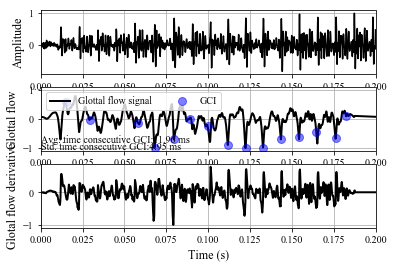

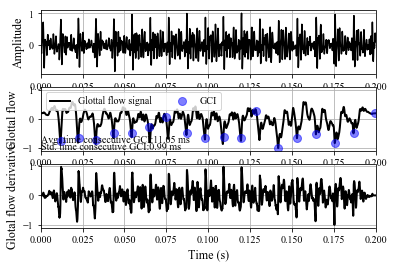

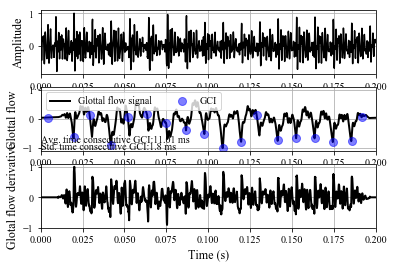

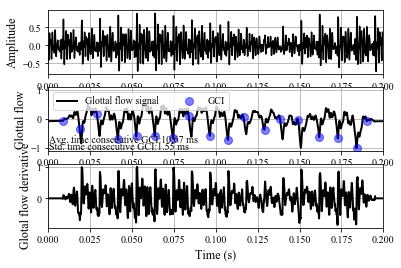

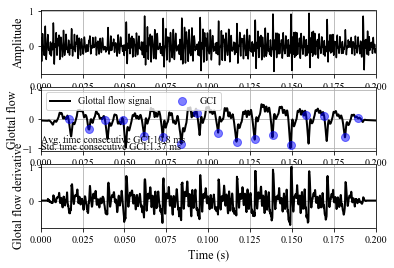

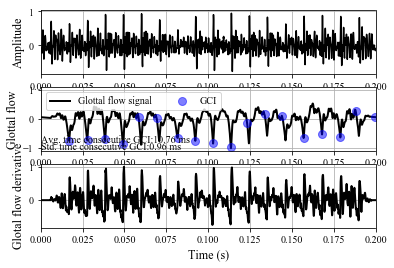

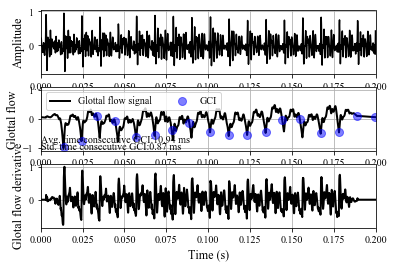

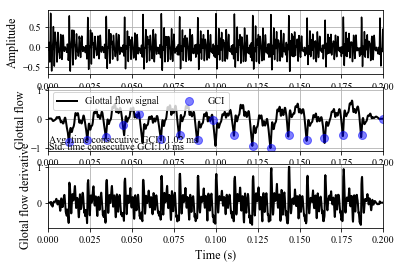

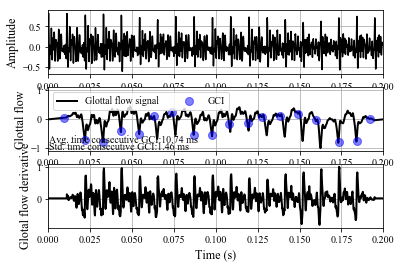

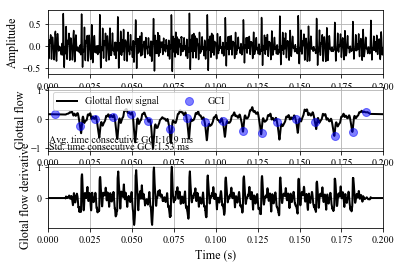

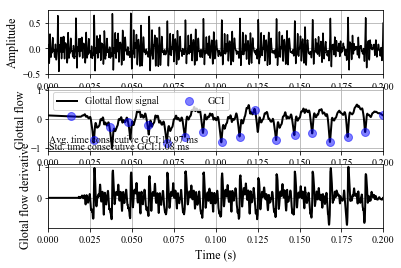

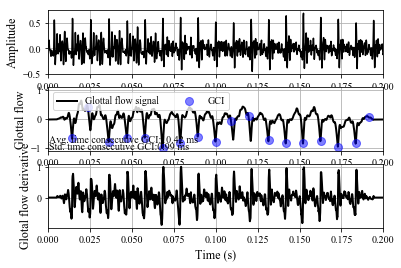

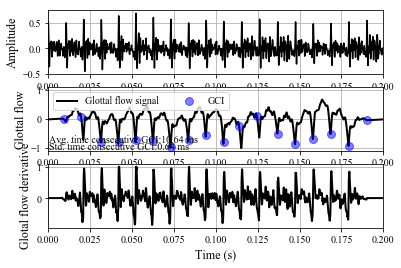

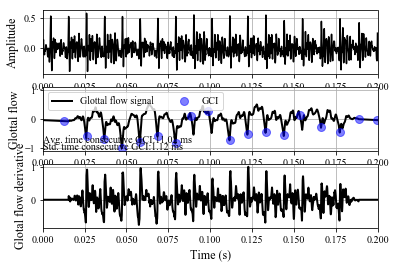

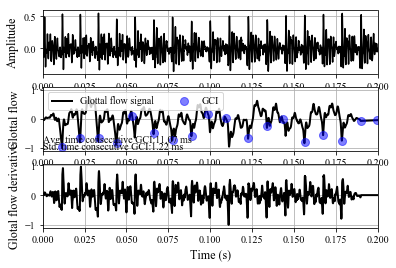

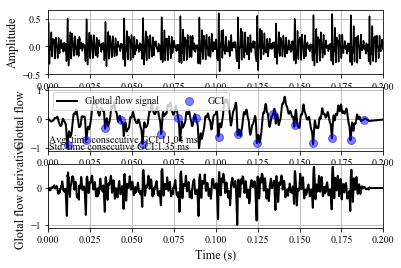

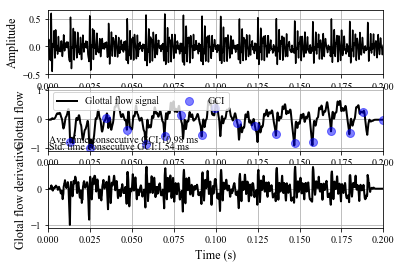

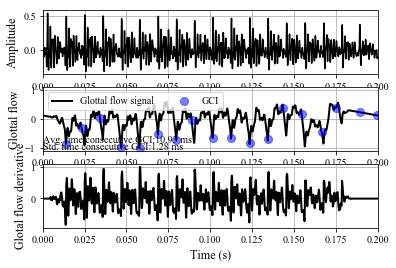

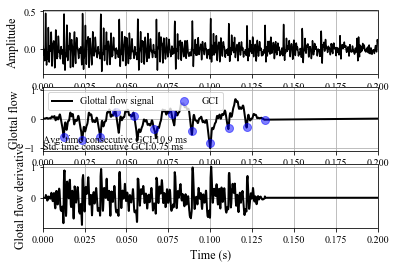

In [3]:
features1=glottalf.extract_features_file(file_audio, static=True, plots=True, fmt="npy")

In [4]:
print(features1)

[ 1.39133182e-03  5.41327015e-03  2.12189551e-03  5.12760309e-01
  2.18240075e-01  1.15702750e+01  5.85292466e+00 -4.57536148e+01
  7.45409923e+01  8.89566834e-04  1.32281729e-03  6.11395059e-04
  8.97815019e-02  4.17835114e-02  1.39465131e+00  1.10210873e+00
  2.57787304e+01  5.81069378e+01  3.28819486e+00  4.89158886e-01
  6.41480344e-01  9.21911960e-01  6.11000917e-01 -2.98912175e-01
 -5.08026890e-03 -1.15996318e+00  1.93993954e+00  1.05409000e+01
 -5.15777295e-02 -4.17681963e-01  1.15947171e-01 -3.21015160e-01
 -8.91246804e-01 -7.18963864e-01  1.57706689e+00  3.44660368e+00]


## Extract static features and return them as a dataframe 

In [5]:
features1=glottalf.extract_features_file(file_audio, static=True, plots=False, fmt="csv")
print(features1)

   global avg var GCI  global avg avg NAQ  global avg std NAQ  \
0            0.001391            0.005413            0.002122   

   global avg avg QOQ  global avg std QOQ  global avg avg H1H2  \
0             0.51276             0.21824            11.570275   

   global avg std H1H2  global avg avg HRF  global avg std HRF  \
0             5.852925          -45.753615           74.540992   

   global std var GCI  ...  global skewness std HRF  global kurtosis var GCI  \
0             0.00089  ...                  1.93994                  10.5409   

   global kurtosis avg NAQ  global kurtosis std NAQ  global kurtosis avg QOQ  \
0                -0.051578                -0.417682                 0.115947   

   global kurtosis std QOQ  global kurtosis avg H1H2  \
0                -0.321015                 -0.891247   

   global kurtosis std H1H2  global kurtosis avg HRF  global kurtosis std HRF  
0                 -0.718964                 1.577067                 3.446604  

[1 rows

## Extract dynamic features and return them as a dataframe

In [6]:
features1=glottalf.extract_features_file(file_audio, static=False, plots=False, fmt="csv")
print(features1.head())

/home/camilo/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


    var GCI   avg NAQ   std NAQ   avg QOQ   std QOQ   avg H1H2  std H1H2  \
0  0.004950  0.007170  0.003381  0.472011  0.312025  12.607072  7.156796   
1  0.000987  0.005656  0.001485  0.481214  0.183335  13.907595  6.469413   
2  0.001797  0.005673  0.002445  0.499485  0.221526  12.049476  7.455828   
3  0.001551  0.004978  0.001883  0.460176  0.194136  11.516019  6.380205   
4  0.001365  0.005533  0.002078  0.512619  0.187696  12.227340  6.710549   

      avg HRF     std HRF  
0  -88.978432  128.817833  
1  -26.387638   28.509634  
2   -3.780650  173.124889  
3  -40.750006   68.857917  
4 -119.975951  263.176590  


## Extract dynamic features and return them as a torch tensor

In [7]:
features1=glottalf.extract_features_file(file_audio, static=False, plots=False, fmt="torch")
print(features1.dtype)
print(features1.size())

/home/camilo/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


torch.float64
torch.Size([19, 9])


## Extract static features from a path return them as a numpy array

In [8]:
path_audio="../audios/"
features1=glottalf.extract_features_path(path_audio, static=True, plots=False, fmt="npy")
print(features1.shape)

Processing 001_readtext_PCGITA.wav:  50%|█████     | 2/4 [01:04<01:00, 30.02s/it]

Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak
Utterance likely to contain creak


Processing 098_u1_PCGITA.wav: 100%|██████████| 4/4 [03:49<00:00, 57.34s/it]      

(4, 36)
